# Import data set

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv("Heart_disease_cleveland_new.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


# Check for missing values

In [10]:
df.info()
df.isnull().sum()
(df == "?").sum()

<class 'pandas.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The dataset contains no missing or null values.  
All features are properly formatted as numeric types.  
No preprocessing was required for missing data.

# Target Distribution (histogram)

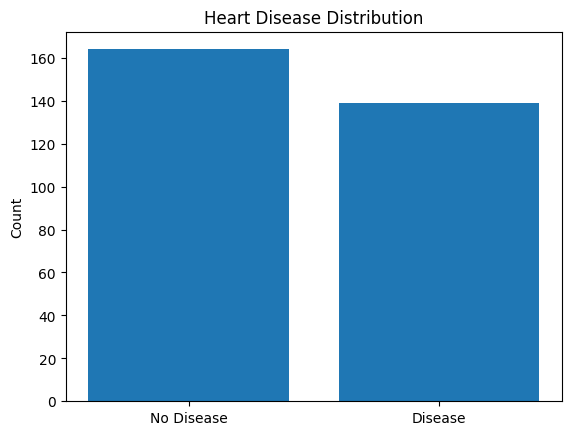

In [17]:
import matplotlib.pyplot as plt

counts = df["target"].value_counts().sort_index()

plt.bar(["No Disease", "Disease"], counts.values)
plt.title("Heart Disease Distribution")
plt.ylabel("Count")
plt.show()

# Chest Pain VS Heart Disease (Target)

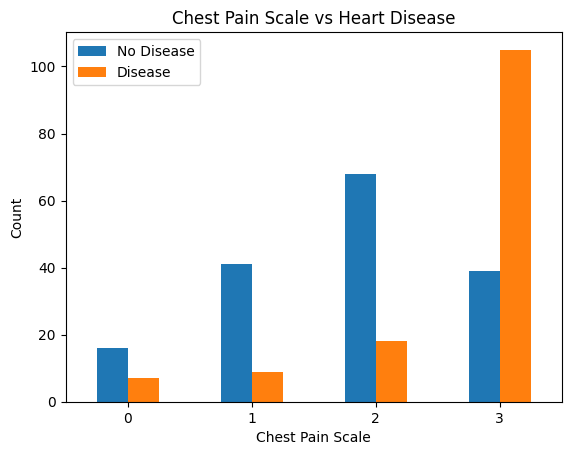

In [21]:
cp_hd = pd.crosstab(df["cp"], df["target"])

cp_hd.plot(kind="bar")
plt.title("Chest Pain Scale vs Heart Disease")
plt.xlabel("Chest Pain Scale")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.show()

As expected, chest pain has a strong correlation with heart disease.

# Max Heart Rate VS Heart Disease

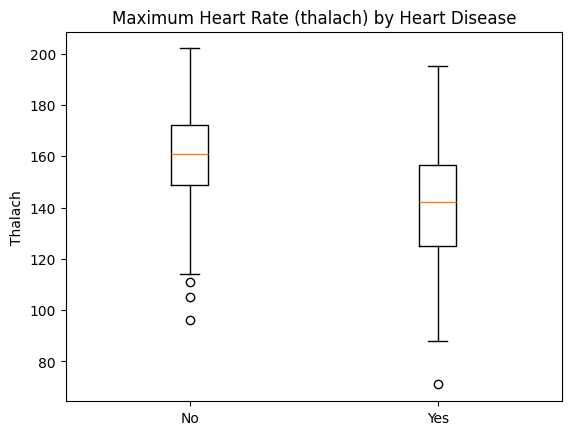

In [27]:
yes_hr = df[df["target"] == 1]["thalach"]
no_hr = df[df["target"] == 0]["thalach"]

plt.boxplot([no_hr, yes_hr], tick_labels=["No", "Yes"])
plt.title("Maximum Heart Rate (thalach) by Heart Disease")
plt.ylabel("Thalach")
plt.show()

It appears that individuals with heart disease tend to have lower max heart rates.

# Oldpeak VS Heart Disease

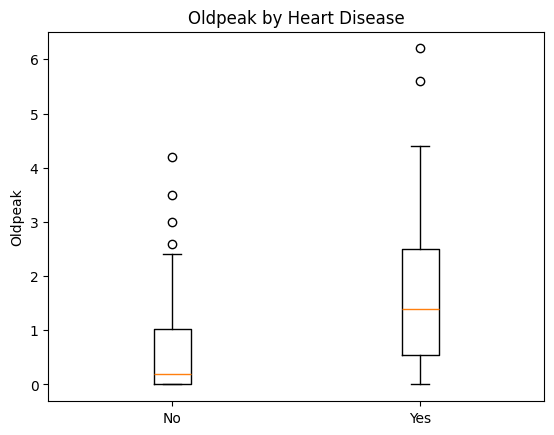

In [36]:
yes_oldpeak = df[df["target"] == 1]["oldpeak"]
no_oldpeak = df[df["target"] == 0]["oldpeak"]

plt.boxplot([no_oldpeak, yes_oldpeak], tick_labels=["No", "Yes"])
plt.title("Oldpeak by Heart Disease")
plt.ylabel("Oldpeak")
plt.show()

It seems that higher ST values in the ECG are associated with heart disease.

# Cholesterol VS Heart Disease

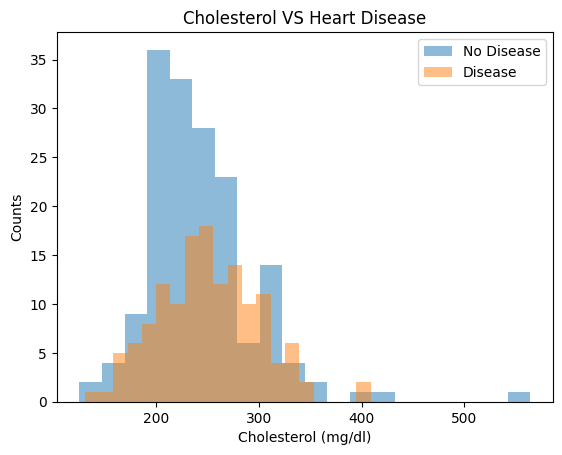

In [38]:
yes_chol = df[df["target"] == 1]["chol"]
no_chol = df[df["target"] == 0]["chol"]

plt.hist(no_chol, bins=20, alpha=0.5, label="No Disease")
plt.hist(yes_chol, bins=20, alpha=0.5, label="Disease")

plt.title("Cholesterol VS Heart Disease")
plt.xlabel("Cholesterol (mg/dl)")
plt.ylabel("Counts")
plt.legend()
plt.show()

There is no clear correlation between cholesterol levels and heart disease.

# Age VS Heart Disease

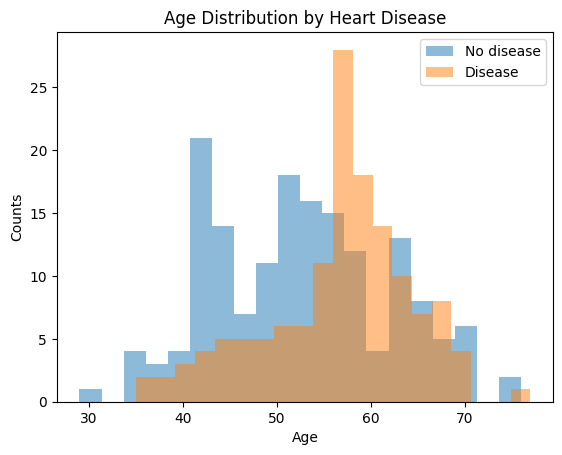

In [41]:
yes_age = df[df["target"] == 1]["age"]
no_age = df[df["target"] == 0]["age"]

plt.hist(no_age, bins=20, alpha=0.5, label="No disease")
plt.hist(yes_age, bins=20, alpha=0.5, label="Disease")
plt.title("Age Distribution by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Counts")
plt.legend()
plt.show()

The histogram suggests that heart disease is more prevalent among older individuals, with a noticeable shift towards the higher ages of the disease group.

# Correlation matrix

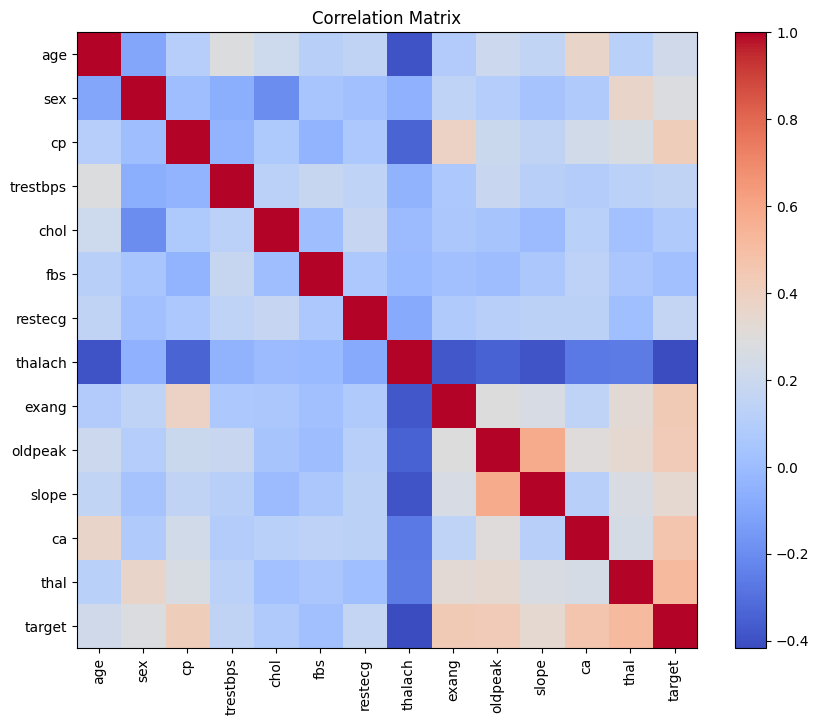

In [46]:
corr_matrix = df.corr()
corr_matrix["target"].sort_values()

plt.figure(figsize=(10,8))

plt.imshow(corr_matrix, cmap="coolwarm", aspect="auto")
plt.colorbar()

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

plt.title("Correlation Matrix")
plt.show()

The strongest correlations with the target variable are observed for oldpeak, ca, thal, cp, and exang (positive), while thalach shows a negative relationship. These variables are likely to contribute significantly to predictive modeling.

# Logistic Regression

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1) ft, target
ft = df.drop("target", axis=1) #features
target = df["target"] #target

# 2) split
ft_train, ft_test, target_train, target_test = train_test_split(
    ft, target, test_size=0.2, random_state=25
)

# 3) scaling
scaler = StandardScaler()
ft_train_scaled = scaler.fit_transform(ft_train)
ft_test_scaled = scaler.transform(ft_test)

# 4) model
model = LogisticRegression(max_iter=1000)
model.fit(ft_train_scaled, target_train)

# 5) predict
target_pred = model.predict(ft_test_scaled)

# 6) evaluate
acc = accuracy_score(target_test, target_pred)
cm = confusion_matrix(target_test, target_pred)

print("Accuracy:", round(acc, 3))
print("Confusion matrix:\n", cm)
print("\nClassification report:\n", classification_report(target_test, target_pred))

Accuracy: 0.885
Confusion matrix:
 [[26  5]
 [ 2 28]]

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        31
           1       0.85      0.93      0.89        30

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



# Final project insight

A logistic regression model was developed to predict the presence of heart disease using the Cleveland Heart Disease dataset.
The model achiever an accuracy of approx. 89-92% on the test set, largely depending on the train/test split due to the dataset's small size.
The recall score for detecting heart disease cases was strong (around 88-91%), indicating effective identification of positive cases.
The confusion matrix showed a low number of False Negatives, which is especially important in a medical context.

Based on correlation analysis and model coefficients, the most influential features were:

-oldpeak (exercise-induced ST depression)

-cp (chest pain type)

-thalach (max heart rate - negative relationship)

-exang (exercise-induced angina)

-ca (number of major vessels)

Model performance varied slightly depending on the random train/test split due to the relatively small dataset size (303 samples). This suggests that while the model performs strongly, further validation using cross-validation or larger datasets would improve reliability.